#Imports


In [ ]:
!pip install ktrain

In [ ]:
import re
import json
import pandas as pd
import numpy as np
import spacy
import statistics
import ktrain

from numpy import nan
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import DATA

In [ ]:
DATA = pd.read_csv('/content/drive/MyDrive/DATA_full.csv')

In [ ]:
MBTI = pd.read_csv('/content/drive/My Drive/MBTI_full.csv')

In [ ]:
DATA = DATA.drop(['Unnamed: 0', 'Segment'], axis='columns')
MBTI = MBTI.drop(['Unnamed: 0', 'Segment'], axis='columns')

#Import keras utils

In [ ]:
import keras 

from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation

import tensorflow as tf

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
num_of_words=50000

In [ ]:
le = preprocessing.LabelEncoder()
t = Tokenizer(num_words=num_of_words, lower=True)

In [ ]:
stop = stopwords.words('english')

#Sequence to matrix

In [ ]:
docs = DATA['Speech'].append(MBTI['posts'], ignore_index=True) 

NameError: ignored

In [ ]:
t.fit_on_texts(docs)

NameError: ignored

In [ ]:
DATA_TtS = t.texts_to_sequences(DATA['Speech'])
MBTI_TtS = t.texts_to_sequences(MBTI['posts'])

In [ ]:
#DATA_Mat = t.texts_to_matrix(DATA['Speech'])

In [ ]:
#MBTI_Mat = t.texts_to_matrix(MBTI['posts'])

In [ ]:
list_mean = list()

for i in range(len(DATA_TtS)):
  list_mean.append(len(DATA_TtS[i]))

mean = statistics.mean(list_mean)
median = statistics.median(list_mean)
std = statistics.stdev(list_mean)
var = statistics.variance(list_mean)

In [ ]:
max_len = int(round(mean + 2*std, 0))

In [ ]:
#DATA_seq_pad = t.sequences_to_matrix(DATA_TtS, mode='tfidf')
#MBTI_seq_pad = t.sequences_to_matrix(MBTI_TtS, mode='tfidf')

In [ ]:
#DATA_allX = pd.concat([pd.DataFrame(DATA_seq_pad),DATA.iloc[:,2:]], axis='columns')
#MBTI_allX = pd.concat([pd.DataFrame(MBTI_seq_pad), MBTI.iloc[:,2:]], axis='columns')

In [ ]:
#del MBTI_seq_pad

In [ ]:
#DATA_LIWConly = DATA.iloc[:,2:].to_numpy(na_value=0)
#MBTI_LIWConly = MBTI.iloc[:,2:].to_numpy(na_value=0)

In [ ]:
#DATA_LIWConly

#Define X,x // Y,y

In [ ]:
MBTI['type'] = le.fit_transform(MBTI['type'])

In [ ]:
Labels = MBTI['type']

MBTI -> DATA X y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(MBTI_allX, Labels, test_size=0.33, random_state=42)

In [ ]:
del MBTI_allX

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train,num_classes=16)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=16)

##MODEL MBTI

In [ ]:
model = Sequential()
model.add(tf.keras.layers.Dense(256,input_shape=(X_train[0].shape)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(tf.keras.layers.Dense(16, activation='softmax'))

In [ ]:
model.compile(optimizer='SGD' ,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=64,epochs=10)

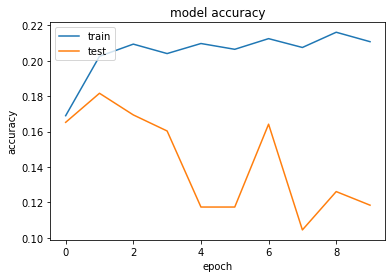

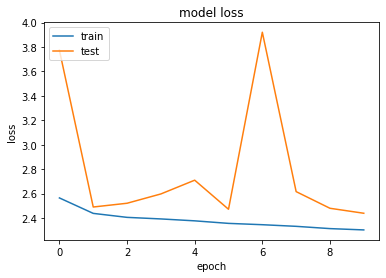

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model Functional

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


from ktrain import text

In [ ]:
df = MBTI[['posts','type']]

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
dfpost = df['posts']

In [ ]:
df

,posts,type
0,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,INFJ
1,'I'm finding the lack of me in these posts ver...,ENTP
2,'Good one _____ https://www.youtube.com/wat...,INTP
3,"'Dear INTP, I enjoyed our conversation the o...",INTJ
4,'You're fired.|||That's another silly misconce...,ENTJ
...,...,...
8670,'https://www.youtube.com/watch?v=t8edHB_h908||...,ISFP
8671,'So...if this thread already exists someplace ...,ENFP
8672,'So many questions when i do these things. I ...,INTP
8673,'I am very conflicted right now when it comes ...,INFP


In [ ]:
df = pd.concat([df, df.type.astype('str').str.get_dummies()], axis=1, sort=False)
#df = df[['text', 'neg', 'pos']]
#df.head()

In [ ]:
df.head()

,posts,type,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,INFJ,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,'I'm finding the lack of me in these posts ver...,ENTP,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,'Good one _____ https://www.youtube.com/wat...,INTP,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,"'Dear INTP, I enjoyed our conversation the o...",INTJ,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,'You're fired.|||That's another silly misconce...,ENTJ,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.drop('type', axis=1, inplace=True)

In [ ]:
df.rename(columns={'posts':'text'}, inplace=True)

In [ ]:
df.head()

,text,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,'I'm finding the lack of me in these posts ver...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,'Good one _____ https://www.youtube.com/wat...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,"'Dear INTP, I enjoyed our conversation the o...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,'You're fired.|||That's another silly misconce...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns[1:].tolist()

['ENFJ',
 'ENFP',
 'ENTJ',
 'ENTP',
 'ESFJ',
 'ESFP',
 'ESTJ',
 'ESTP',
 'INFJ',
 'INFP',
 'INTJ',
 'INTP',
 'ISFJ',
 'ISFP',
 'ISTJ',
 'ISTP']

In [ ]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(df, 
                                                                   'text', # name of column containing review text
                                                                   label_columns= df.columns[1:].tolist(),
                                                                   maxlen=75, 
                                                                   max_features=100000,
                                                                   preprocess_mode='bert',
                                                                   val_pct=0.1,
                                                                   ngram_range=3)

['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']
      ENFJ  ENFP  ENTJ  ENTP  ESFJ  ESFP  ...  INTJ  INTP  ISFJ  ISFP  ISTJ  ISTP
2279     0     0     0     1     0     0  ...     0     0     0     0     0     0
1469     0     0     0     0     0     0  ...     0     0     0     0     0     0
6068     0     0     0     0     0     0  ...     1     0     0     0     0     0
3117     0     0     0     0     0     0  ...     0     0     0     1     0     0
4797     0     0     0     0     0     0  ...     0     0     0     0     0     1

[5 rows x 16 columns]
['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']
      ENFJ  ENFP  ENTJ  ENTP  ESFJ  ESFP  ...  INTJ  INTP  ISFJ  ISFP  ISTJ  ISTP
579      0     0     0     0     0     0  ...     0     0     0     0     0     0
4396     0     0     1     0     0     0  ...     0     0     0

In [ ]:
model = text.text_classifier('nbsvm', (x_train, y_train) , preproc=preproc)
learner = ktrain.get_learner(model, 
                             train_data=(x_train, y_train), 
                             val_data=(x_test, y_test), 
                             batch_size=32)

Is Multi-Label? False
compiling word ID features...
maxlen is 75
building document-term matrix... this may take a few moments...
rows: 1-7807
computing log-count ratios...
done.


In [ ]:
learner.autofit(5e-3, 1)



begin training using triangular learning rate policy with max lr of 0.005...
244/244 [==============================] - 22s 87ms/step - loss: 2.7363 - accuracy: 0.1029 - val_loss: 2.5220 - val_accuracy: 0.1659


In [ ]:
df_train = df.sample(frac=0.85, random_state=42)
df_test = df.drop(df_train.index)
len(df_train), len(df_test)

(7374, 1301)

In [ ]:
MODEL_NAME = 'bert-base-uncased'
t = text.Transformer(MODEL_NAME, maxlen=128)
trn = t.preprocess_train(df_train.posts.values, df_train.type.values)
val = t.preprocess_test(df_test.posts.values, df_test.type.values)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=32)
learner.fit_onecycle(5e-5, 1)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

preprocessing train...
language: en
train sequence lengths:
	mean : 1225
	95percentile : 1643
	99percentile : 1738


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 1231
	95percentile : 1630
	99percentile : 1735


Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]



begin training using onecycle policy with max lr of 5e-05...
123/231 [==============>...............] - ETA: 1:17:10 - loss: 2.3834 - accuracy: 0.1994

In [ ]:
docs = DATA['Speech'].append(MBTI['posts'], ignore_index=True)
t.fit_on_texts(docs)

DATA_TtS = t.texts_to_sequences(DATA['Speech'])
MBTI_TtS = t.texts_to_sequences(MBTI['posts'])

Ktrain // BERT
-> transfert learning

In [ ]:
DATA_LIWConly = DATA.iloc[:,2:].to_numpy(na_value=0)
MBTI_LIWConly = MBTI.iloc[:,2:].to_numpy(na_value=0)

In [ ]:
MBTI['type'] = le.fit_transform(MBTI['type'])

Labels = MBTI['type']

Labels = tf.keras.utils.to_categorical(Labels, num_classes=16)

In [ ]:
num_LIWC = len(MBTI_LIWConly[0])  # Number of unique issue tags
num_words = len(t.word_docs)  # Size of vocabulary obtained when preprocessing text data
num_class = len(Labels[0])  # Number of departments for predictions

In [ ]:
type(MBTI_TtS)

list

In [ ]:
MBTI_TtS2 = np.array([np.array(xi) for xi in MBTI_TtS])
DATA_TtS2 = np.array([np.array(xi) for xi in DATA_TtS])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
type(MBTI_TtS2)

numpy.ndarray

In [ ]:
MBTI_TtS2 = MBTI_TtS2.tolist()
DATA_TtS2 = DATA_TtS2.tolist()

In [ ]:
#title_input = keras.Input(
#    shape=(None,), name="title"
#)  # Variable-length sequence of ints
body_input = keras.Input(shape=(None,), name="body")  # Variable-length sequence of ints
tags_input = keras.Input(
    shape=(num_LIWC,), name="LIWC"
)  # Binary vectors of size `num_tags`

# Embed each word in the title into a 64-dimensional vector
#title_features = layers.Embedding(num_words, 64)(title_input)
# Embed each word in the text into a 64-dimensional vector
body_features = layers.Embedding(num_words, 64)(body_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
#title_features = layers.LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = layers.LSTM(32)(body_features)

dense_features = layers.Dense(16)(body_features)

dropOut_features = layers.Dropout(0.3)(dense_features)

# Merge all available features into a single large vector via concatenation
#x = layers.concatenate([title_features, body_features, tags_input])
x = layers.concatenate([dropOut_features, tags_input])

# Stick a logistic regression for priority prediction on top of the features
#priority_pred = layers.Dense(1, name="priority")(x)
# Stick a department classifier on top of the features
dense_concat_1 = layers.Dense(64)(x)

dense_concat_2 = layers.Dense(64)(dense_concat_1)

personality_pred = layers.Dense(num_class, name="personality", activation='sigmoid')(dense_concat_2)

# Instantiate an end-to-end model predicting both priority and department
#model = keras.Model(
#    inputs=[title_input, body_input, tags_input],
#    outputs=[priority_pred, department_pred],
#)
model = keras.Model(
    inputs=[body_input, tags_input],
    outputs=[personality_pred],
)

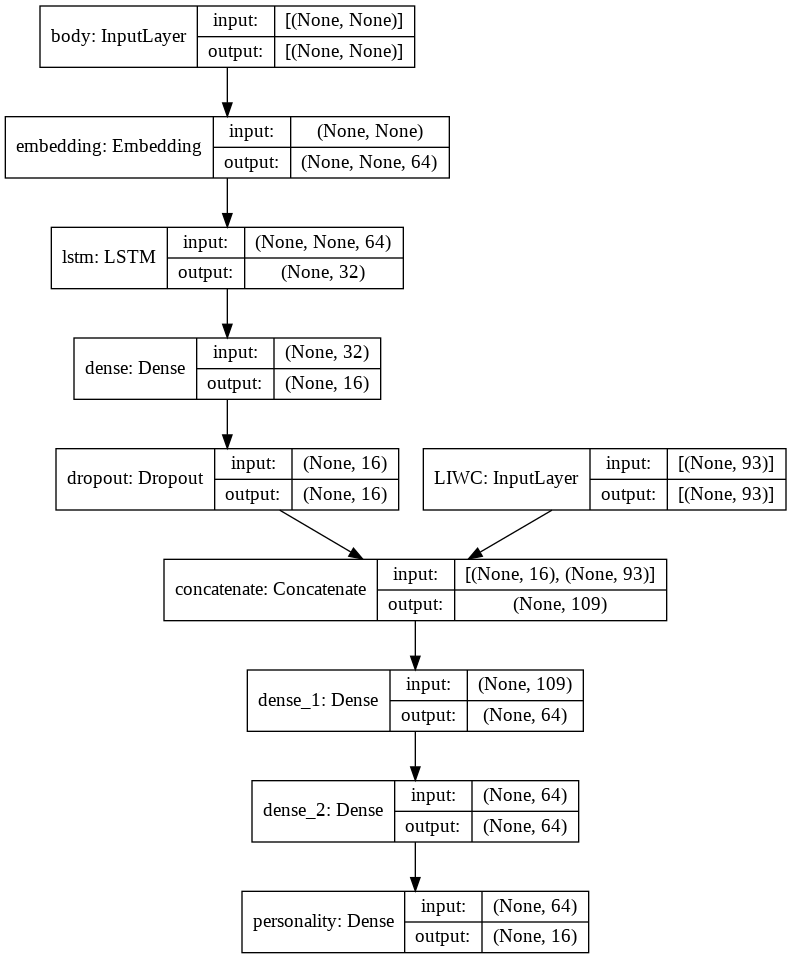

In [ ]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss={
        "personality": keras.losses.BinaryCrossentropy(from_logits=False),
    },
    loss_weights={"personality": 1.0},
    metrics = ['accuracy'],
)

In [ ]:
type(MBTI_TtS)

list

In [ ]:
len(MBTI_TtS[1])

1271

In [ ]:
MBTI_TtS2 = pd.DataFrame(MBTI_TtS2)
DATA_TtS2 = pd.DataFrame(DATA_TtS2)

In [ ]:
MBTI_TtS2 = MBTI_TtS2.fillna(0)
DATA_TtS2 = DATA_TtS2.fillna(0)

In [ ]:
history = model.fit(
    {"body": MBTI_TtS2, "LIWC": MBTI_LIWConly},
    {"personality": Labels},
    epochs=3,
    batch_size=32,
    validation_split=0.33,
    verbose=2,
)

Epoch 1/10
182/182 - 209s - loss: 3.7098 - accuracy: 0.1382 - val_loss: 3.3055 - val_accuracy: 0.0073
Epoch 2/10
182/182 - 208s - loss: 2.3718 - accuracy: 0.1275 - val_loss: 1.7525 - val_accuracy: 0.2008
Epoch 3/10
182/182 - 209s - loss: 1.9986 - accuracy: 0.1359 - val_loss: 4.7263 - val_accuracy: 0.1418
Epoch 4/10
182/182 - 211s - loss: 1.6674 - accuracy: 0.1394 - val_loss: 2.4055 - val_accuracy: 0.2005
Epoch 5/10
182/182 - 210s - loss: 1.3830 - accuracy: 0.1385 - val_loss: 1.2378 - val_accuracy: 0.1694
Epoch 6/10
182/182 - 207s - loss: 1.0995 - accuracy: 0.1497 - val_loss: 1.4534 - val_accuracy: 0.0276
Epoch 7/10
182/182 - 209s - loss: 0.8963 - accuracy: 0.1507 - val_loss: 0.8226 - val_accuracy: 0.1642
Epoch 8/10
182/182 - 211s - loss: 0.7312 - accuracy: 0.1528 - val_loss: 0.6211 - val_accuracy: 0.0807
Epoch 9/10
182/182 - 210s - loss: 0.5997 - accuracy: 0.1626 - val_loss: 0.7400 - val_accuracy: 0.1687
Epoch 10/10
182/182 - 210s - loss: 0.4954 - accuracy: 0.1709 - val_loss: 0.3800 - 

In [ ]:
model.save_weights(filepath='/content/drive/MyDrive/Model_LateLIWC.h5')

#Pseudo label

In [ ]:
preds = model.predict({"body": DATA_TtS2, "LIWC": DATA_LIWConly}, batch_size=32)

In [ ]:
i_trn = 0
i_test = 0
# iterate through 800 mini-batch
num_iter = 800
# mini-batch size
size_trn = 48
size_test = 16
# we must know how many batches are there per epoch to decide 
# when to shuffle index array
num_batch_per_epoch_trn = int(MBTI_TtS2.shape[0]/size_trn)
num_batch_per_epoch_test = int(DATA_TtS2.shape[0]/size_test)
# Create an shuffled index array
index_trn = np.random.permutation(num_batch_per_epoch_trn)
index_test = np.random.permutation(num_batch_per_epoch_test)

In [ ]:
preds

array([[1.63942575e-04, 1.86483264e-02, 1.75778002e-01, ...,
        1.12223625e-03, 1.40548944e-01, 9.99167204e-01],
       [4.21619370e-05, 7.76022673e-04, 1.17283255e-01, ...,
        1.93406777e-05, 2.83685327e-03, 9.85799134e-01],
       [1.67530688e-05, 9.63181257e-04, 5.03340900e-01, ...,
        1.84297562e-04, 1.16053820e-02, 9.92799520e-01],
       ...,
       [3.71870399e-03, 1.61061883e-02, 9.08449769e-01, ...,
        2.89046764e-03, 8.12074542e-03, 9.98921514e-01],
       [5.43922186e-04, 4.41418194e-07, 3.68656983e-20, ...,
        2.08028579e-16, 8.82262188e-29, 7.93497909e-24],
       [7.51605630e-03, 3.72260511e-02, 3.74848604e-01, ...,
        5.96236678e-05, 2.76318096e-05, 9.77473259e-01]], dtype=float32)

In [ ]:
MBTI_TtS2[(size_trn*i_trn):size_trn*(i_trn+1)].shape

(48, 1943)

In [ ]:
DATA_TtS2[(size_test*i_test):size_test*(i_test+1)].shape

(16, 17771)

In [ ]:
DATA_TtS2.iloc[(size_test*i_test):size_test*(i_test+1),:1943]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942
3072,5,40,24,16,11.0,143.0,2268.0,26111.0,5210.0,11482.0,5.0,42.0,1.0,25.0,16.0,6734.0,12.0,584.0,513.0,14.0,3.0,390.0,38.0,45309.0,1.0,79.0,452.0,20.0,168.0,230.0,13.0,319.0,515.0,711.0,711.0,1.0,50.0,38245.0,9.0,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3073,2,3019,7,1143,1589.0,10.0,11.0,2.0,10126.0,3383.0,126.0,3.0,130.0,80.0,5469.0,168.0,23.0,2.0,3019.0,10.0,37.0,323.0,80.0,2.0,1143.0,11.0,142.0,6090.0,322.0,155.0,82.0,1690.0,8.0,18.0,2269.0,99.0,84.0,82.0,5.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3074,48,7,5,1536,98.0,5596.0,683.0,4.0,1820.0,112.0,55.0,170.0,403.0,12809.0,733.0,4.0,4741.0,16.0,523.0,4586.0,79.0,4.0,6517.0,150.0,63.0,166.0,2.0,866.0,5316.0,46.0,712.0,61.0,6.0,33.0,14834.0,100.0,10.0,22331.0,4.0,1146.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3075,5,87,4,7798,4265.0,2524.0,5.0,23.0,11.0,3840.0,150.0,62.0,6.0,1871.0,23.0,452.0,2.0,2114.0,15709.0,16.0,523.0,66.0,67.0,20.0,31.0,212.0,221.0,23.0,5.0,60.0,71.0,5.0,86.0,5.0,23.0,34.0,1.0,118.0,94.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3076,18,24,37,87,462.0,2060.0,157.0,795.0,54.0,27.0,37.0,745.0,68.0,18.0,10.0,5.0,28.0,10014.0,4.0,10538.0,179.0,68.0,1676.0,5587.0,184.0,67.0,4.0,1635.0,7995.0,5.0,76.0,137.0,68.0,105.0,8.0,1024.0,72.0,87.0,36.0,1586.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3077,1,275,5,78,41.0,55.0,26.0,78.0,93.0,5.0,160.0,17.0,8.0,1.0,441.0,5.0,103.0,575.0,67.0,532.0,5.0,40.0,10.0,37.0,2119.0,20.0,2.0,1566.0,292.0,3840.0,30.0,24.0,77.0,11.0,10.0,69.0,931.0,305.0,2710.0,29639.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3078,5,307,3369,38685,668.0,49.0,33.0,2786.0,18.0,68.0,112.0,4439.0,1.0,409.0,8.0,53.0,38685.0,212.0,2716.0,131.0,3108.0,12352.0,13.0,342.0,3574.0,4.0,5212.0,13.0,48.0,268.0,319.0,2854.0,13.0,517.0,5.0,5462.0,13.0,241.0,7.0,130.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3079,4248,26,36,237,187.0,4.0,4600.0,187.0,6.0,9.0,4.0,789.0,124.0,4.0,14467.0,11.0,4.0,1364.0,6.0,4.0,1364.0,4.0,3024.0,13.0,127.0,32.0,2.0,866.0,9.0,3316.0,1664.0,24405.0,9.0,7945.0,51.0,7519.0,26.0,29464.0,9653.0,114.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3080,6,1,28,290,679.0,5.0,483.0,5.0,400.0,4.0,260.0,700.0,252.0,3.0,12.0,451.0,2.0,89.0,5.0,108.0,33.0,901.0,13485.0,5.0,103.0,17.0,1525.0,4.0,58.0,9992.0,845.0,27.0,5.0,753.0,560.0,247.0,39.0,54.0,3.0,490.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3081,16,1,27,22,1518.0,294.0,4160.0,27.0,10553.0,15.0,3.0,1057.0,2.0,1846.0,172.0,41.0,8.0,11.0,2.0,1846.0,10.0,11.0,471.0,10553.0,294.0,2.0,1846.0,2.0,554.0,102.0,11.0,29.0,4.0,8411.0,7.0,2094.0,5.0,17.0,65.0,707.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
for i in range(num_iter):
    # Get an index number from the shuffled index array for the current loop i
    i_trn = index_trn[i%num_batch_per_epoch_trn]
    i_test = index_test[i%num_batch_per_epoch_test]    

    """
    Combine training data and pseudo-labeled test data
    For example, when i == 0:
    comb_features = np.concatenate((conv_feat[0:48], conv_test_feat[0:16], axis=0))
    comb_feature contains 48 data from training set and 16 data from pseudo-labeled test set
    similarly, when i == 10:
    comb_labels = np.concatenate((trn_labels[48*10:48*11],preds[16*10:16*11]), axis=0)   
    """    
    comb_features = np.concatenate((MBTI_TtS2[(size_trn*i_trn):size_trn*(i_trn+1)],
                                   DATA_TtS2.iloc[(size_test*i_test):size_test*(i_test+1),:1943]),axis=0)
    comb_LIWCS = np.concatenate((MBTI_LIWConly[(size_trn*i_trn):size_trn*(i_trn+1)],
                                   DATA_LIWConly[(size_test*i_test):size_test*(i_test+1)]), axis=0)
    comb_labels = np.concatenate((Labels[(size_trn*i_trn):size_trn*(i_trn+1)],
                                 preds[(size_test*i_test):size_test*(i_test+1)]), axis=0)

    model.train_on_batch({"body": comb_features, "LIWC": comb_LIWCS}, comb_labels)
    
    # Shuffle index array after model had trained on the last mini-batch.
    if (i+1)%num_batch_per_epoch_trn == 0:
        index_trn = np.random.permutation(num_batch_per_epoch_trn)
    if (i+1)%num_batch_per_epoch_test == 0:
        index_test = np.random.permutation(num_batch_per_epoch_test)

In [ ]:
model.save_weights(filepath='/content/drive/MyDrive/Model_Pseudo_1.h5')

In [ ]:
from sklearn.utils import shuffle
from sklearn.base import BaseEstimator, RegressorMixin

class PseudoLabeler(BaseEstimator, RegressorMixin):
 '''
 Sci-kit learn wrapper for creating pseudo-lebeled estimators.
 '''

 def __init__(self, model, unlabled_data, features, target, sample_rate=0.2, seed=42):
  '''
  @sample_rate - percent of samples used as pseudo-labelled data
  from the unlabelled dataset
  '''
  assert sample_rate <= 1.0, 'Sample_rate should be between 0.0 and 1.0.'

  self.sample_rate = sample_rate
  self.seed = seed
  self.model = model
  self.model.seed = seed

  self.unlabled_data = unlabled_data
  self.features = features
  self.target = target

 def get_params(self, deep=True):
  return {
  "sample_rate": self.sample_rate,
  "seed": self.seed,
  "model": self.model,
  "unlabled_data": self.unlabled_data,
  "features": self.features,
  "target": self.target
  }

 def set_params(self, **parameters):
  for parameter, value in parameters.items():
   setattr(self, parameter, value)
  return self

 def fit(self, X, y):
  '''
  Fit the data using pseudo labeling.
  '''
  augemented_train = self.__create_augmented_train(X, y)
  self.model.fit(
   augemented_train[self.features],
   augemented_train[self.target]
  )
  return self

 def __create_augmented_train(self, X, y):
  '''
  Create and return the augmented_train set that consists
  of pseudo-labeled and labeled data.
  '''
  num_of_samples = int(len(self.unlabled_data) * self.sample_rate)

# Train the model and creat the pseudo-labels
  self.model.fit(X, y)
  pseudo_labels = self.model.predict(self.unlabled_data[self.features])

# Add the pseudo-labels to the test set
  pseudo_data = self.unlabled_data.copy(deep=True)
  pseudo_data[self.target] = pseudo_labels

# Take a subset of the test set with pseudo-labels and append in onto
 # the training set
  sampled_pseudo_data = pseudo_data.sample(n=num_of_samples)
  temp_train = pd.concat([X, y], axis=1)
  augemented_train = pd.concat([sampled_pseudo_data, temp_train])

  return shuffle(augemented_train)

 def predict(self, X):
  '''
  Returns the predicted values.
  '''
  return self.model.predict(X)

 def get_model_name(self):
  return self.model.__class__.__name__